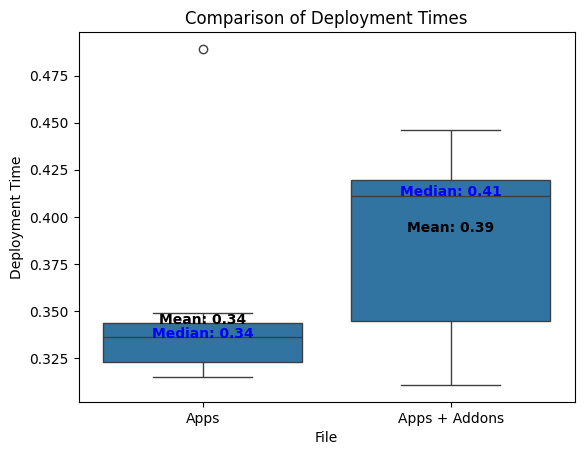

In [4]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the CSV files into pandas DataFrames
df1 = pd.read_csv('deployment1.csv')
df2 = pd.read_csv('deployment2.csv')

# Add a 'File' column to distinguish between the two files
df1['File'] = 'Apps'
df2['File'] = 'Apps + Addons'

# Concatenate the two DataFrames
concat_df = pd.concat([df1, df2])

# Create a boxplot using seaborn
box_plot = sns.boxplot(data=concat_df, x='File', y='deployment_time')

# Calculate the means and medians
means = concat_df.groupby('File')['deployment_time'].mean()
medians = concat_df.groupby('File')['deployment_time'].median()

# Add mean and median lines to the boxplot
for i in range(len(means)):
    box_plot.text(i, means[i], f'Mean: {means[i]:.2f}', horizontalalignment='center', color='black', weight='semibold')
    box_plot.text(i, medians[i], f'Median: {medians[i]:.2f}', horizontalalignment='center', color='blue', weight='semibold')

# Set labels and title
plt.xlabel('File')
plt.ylabel('Deployment Time')
plt.title('Comparison of Deployment Times')

# Show the plot
plt.show()